In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy
!pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_train = pd.read_csv('https://raw.githubusercontent.com/1101madan/Logistic-Regression/main/Titanic_train.csv')
titanic_test = pd.read_csv('https://raw.githubusercontent.com/1101madan/Logistic-Regression/main/Titanic_test.csv')

## Examine the features, Types and Summary Statistics.

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_null = titanic_train.isnull().sum()
test_null = titanic_test.isnull().sum()
print('Train Dataset has: ',train_null,' Null Values')
print('Test Dataset has:',test_null,' Null Values')



Train Dataset has:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64  Null Values
Test Dataset has: PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64  Null Values


In [9]:
# Using Mean Value to fill the Null values from Age Column.

titanic_train['Age']= titanic_train['Age'].fillna(titanic_train['Age'].mean())
titanic_test['Age']= titanic_test['Age'].fillna(titanic_test['Age'].mean())

In [10]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Vizualizing The Data

<Axes: xlabel='Parch', ylabel='count'>

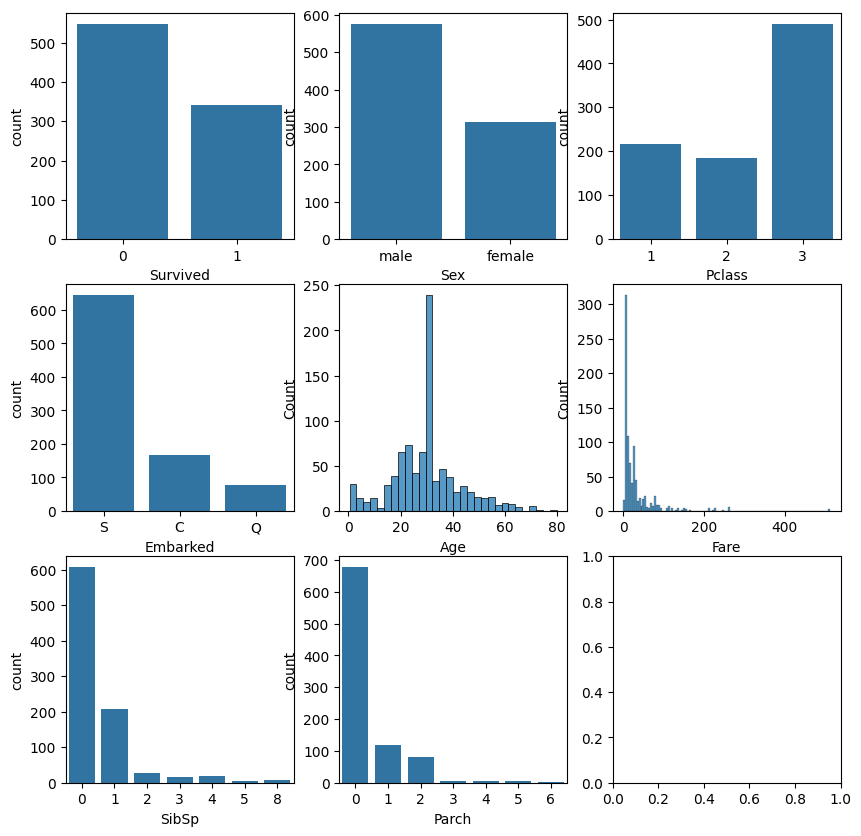

In [12]:
fig,axs = plt.subplots(3,3,figsize=(10,10))
sns.countplot(x=titanic_train['Survived'],ax=axs[0,0])
sns.countplot(x=titanic_train['Sex'],ax=axs[0,1])
sns.countplot(x=titanic_train['Pclass'],ax=axs[0,2])
sns.countplot(x=titanic_train['Embarked'],ax=axs[1,0])
sns.histplot(x=titanic_train['Age'],ax=axs[1,1])
sns.histplot(x=titanic_train['Fare'],ax=axs[1,2])
sns.countplot(x=titanic_train['SibSp'],ax=axs[2,0])
sns.countplot(x=titanic_train['Parch'],ax=axs[2,1])


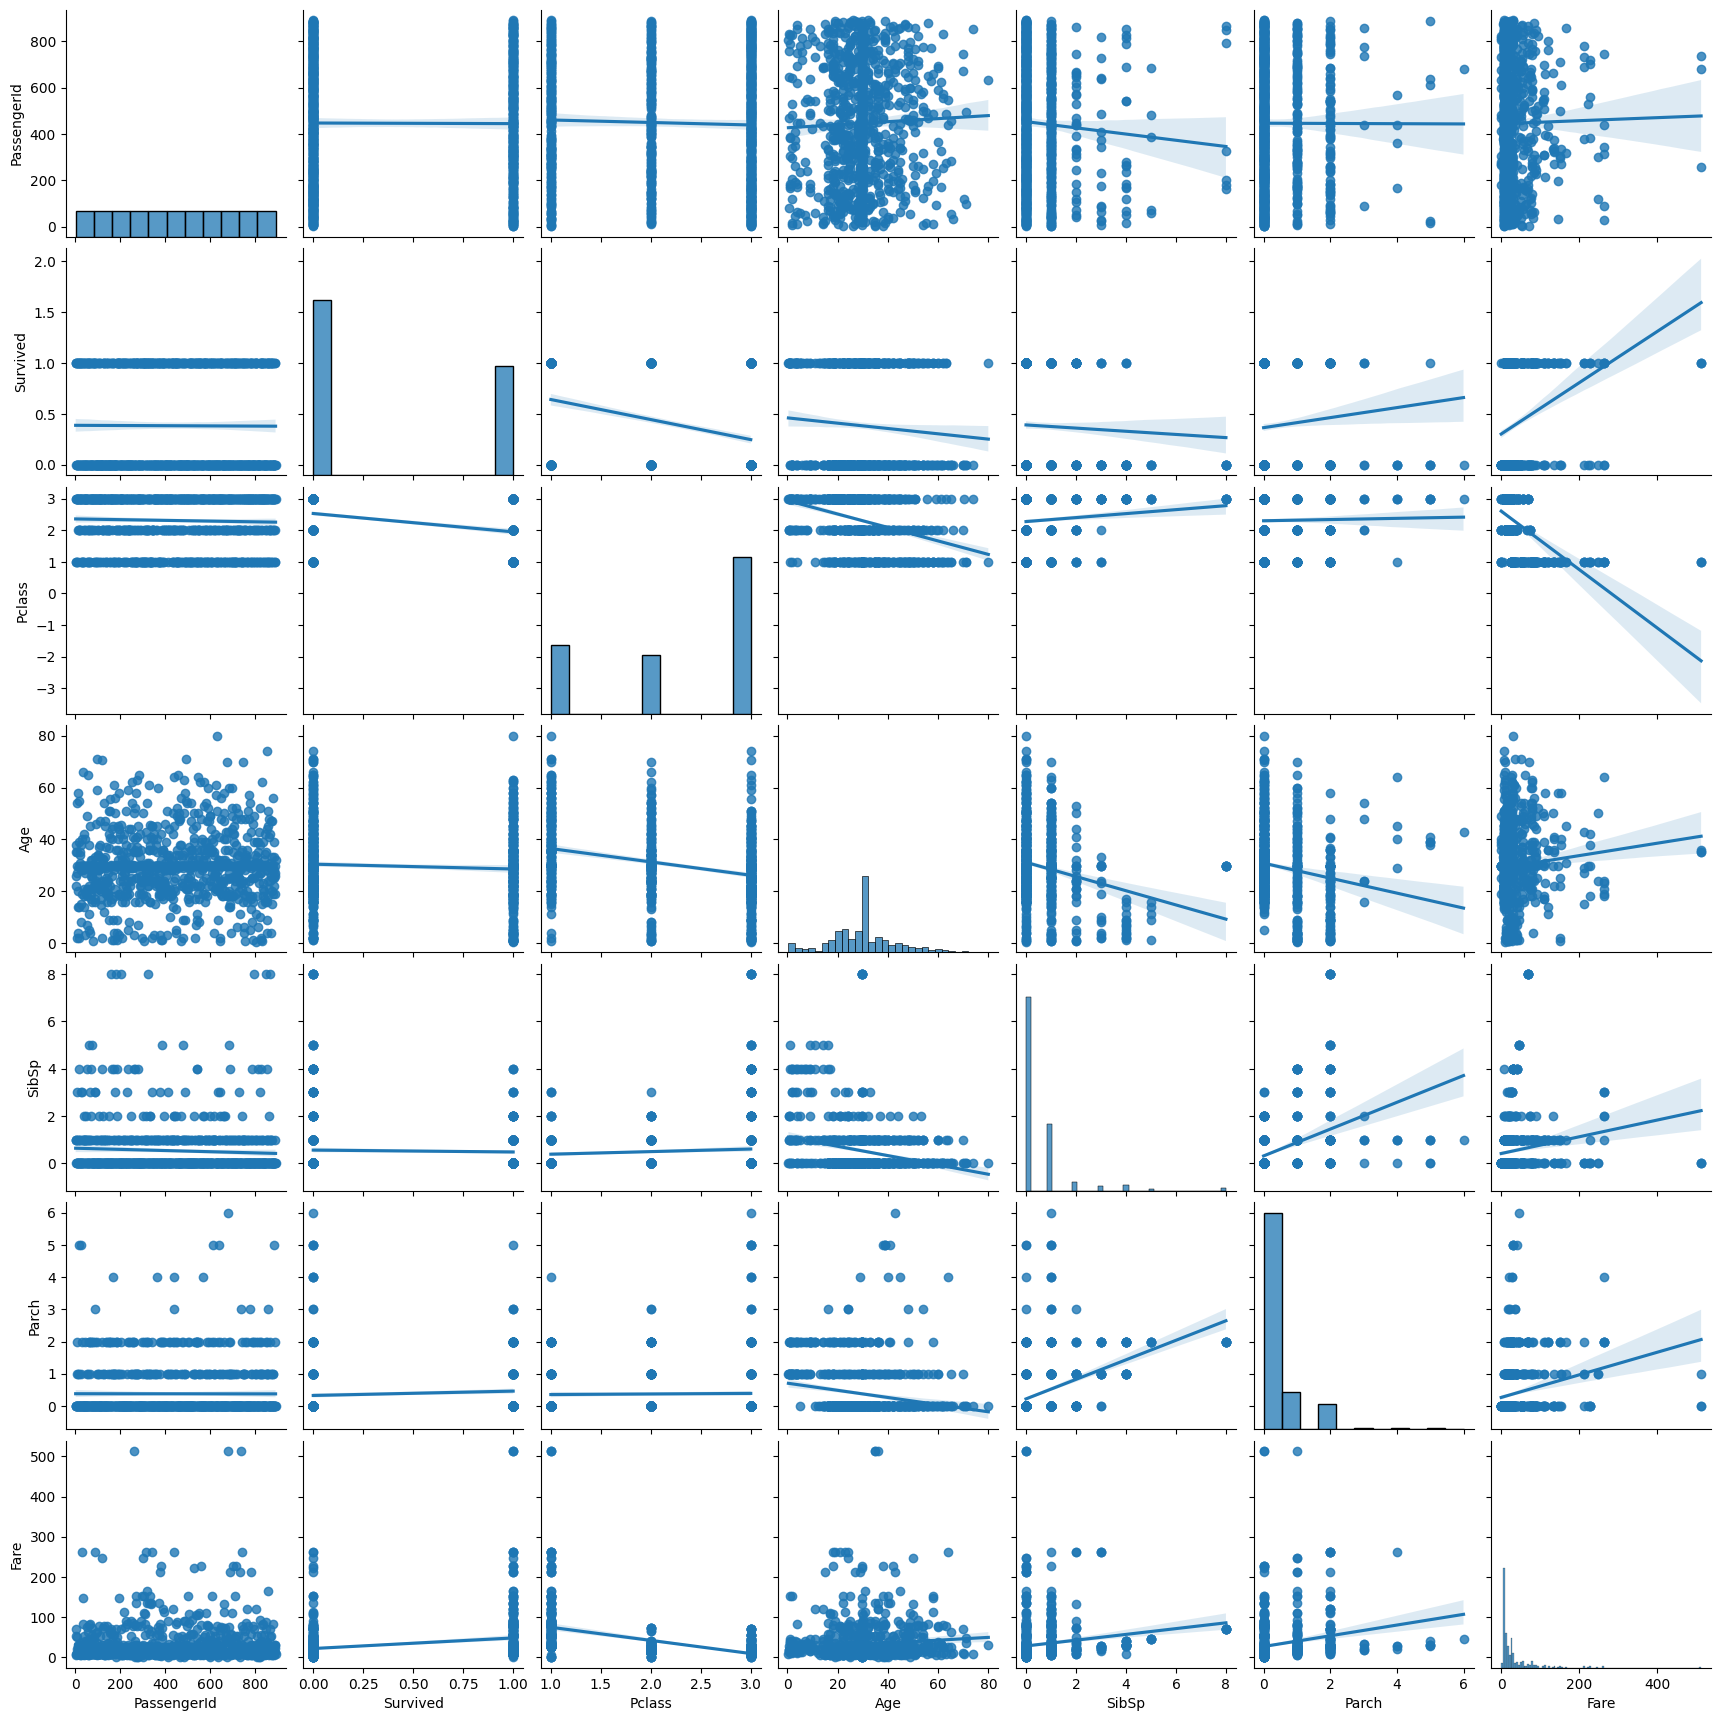

In [13]:
sns.pairplot(titanic_train,kind='reg')

### Dara Preprocessing

In [14]:
## Dropping Columns.
titanic_train.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)
titanic_test.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)


In [15]:
titanic_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
titanic_test.head()



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [17]:
# Encoding categorical Variables
titanic_train = pd.get_dummies(titanic_train,columns=['Sex','Embarked'],dtype=int)
titanic_test = pd.get_dummies(titanic_test,columns=['Sex','Embarked'],dtype=int)


In [18]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [19]:
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


### Model Building

In [20]:
from sklearn.linear_model import LogisticRegression

titanic_train.columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [21]:
response_variable = titanic_train['Survived']

explainatory_variables = titanic_train.iloc[:,1:]


In [22]:
response_variable.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
explainatory_variables.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [24]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(explainatory_variables,response_variable)


LogisticRegression(max_iter=1000)

In [25]:
predicted_values = model1.predict(explainatory_variables)

In [26]:
predict_vs_actual = pd.DataFrame({'Actual_values':response_variable,'Predicted_values':predicted_values})

In [27]:
predict_vs_actual.head()

,Actual_values,Predicted_values
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


### Model Evaluation

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(response_variable,predicted_values)

confusion_matrix


array([[474,  75],
       [102, 240]])

In [29]:
TP = confusion_matrix[0,0]
TN = confusion_matrix[1,1]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

print(TP,TN,FP,FN)


474 240 75 102


In [30]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(response_variable,predicted_values))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [31]:
# ROC AUC SCORE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [32]:
# Vizualizing the model Metrics
fpr, tpr, thresholds = roc_curve(response_variable, model1.predict_proba(explainatory_variables)[:, 1])
auc = roc_auc_score(response_variable,predicted_values)

auc


np.float64(0.7825711820534944)

Text(0, 0.5, 'True Positive Rate')

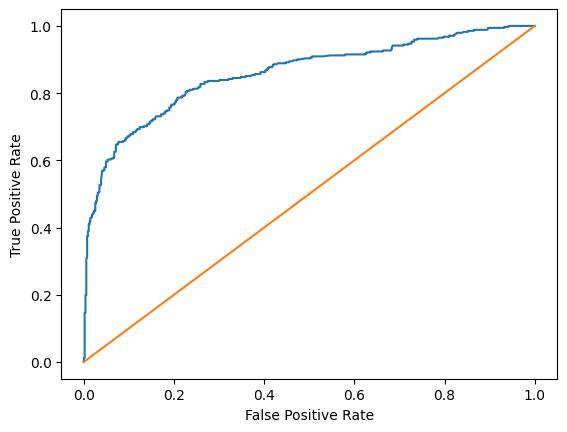

In [33]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')